# Examples for nonlinear filter lecture

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread("../images/pair-color.png")

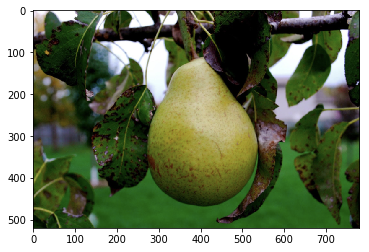

In [3]:
plt.imshow(img[:,:,::-1])

In [4]:
def imshow(img, title=""):
    plt.figure(figsize=(8, 8))
    plt.imshow(img, cmap="gray", vmin = 0, vmax = 255, interpolation="lanczos")
    _ = plt.yticks([])
    _ = plt.xticks([])
    plt.title(title, fontsize=20)

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

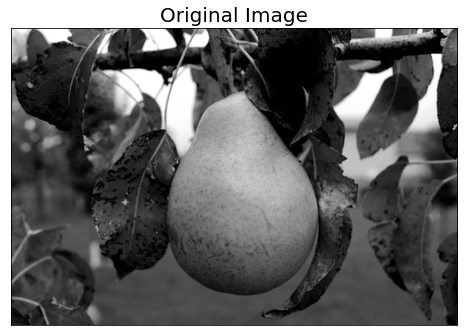

In [6]:
img_disp = np.maximum(0, np.minimum(255, img_gray.astype(int)))
imshow(img_disp, "Original Image")

# Example of simple nonlinear filters


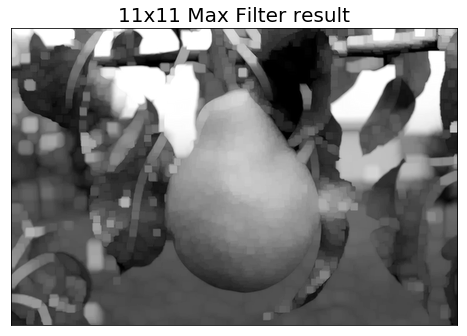

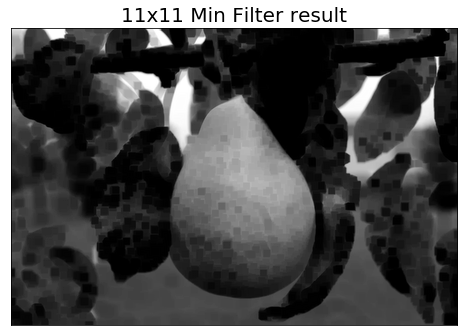

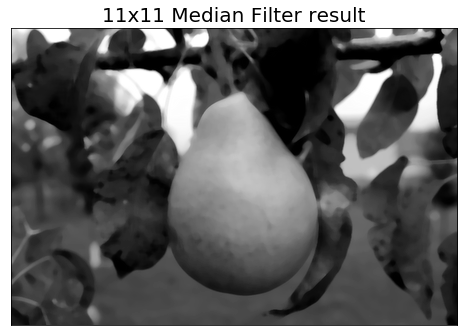

In [7]:
K = 11
img_max = cv2.dilate(img_gray, np.ones((K,K)), iterations=1)
imshow(img_max, "{0}x{0} Max Filter result".format(K))

img_min = cv2.erode(img_gray, np.ones((K,K)), iterations=1)
imshow(img_min, "{0}x{0} Min Filter result".format(K))

img_med = cv2.medianBlur(img_gray, K)
imshow(img_med, "{0}x{0} Median Filter result".format(K))



# Noise removing examples

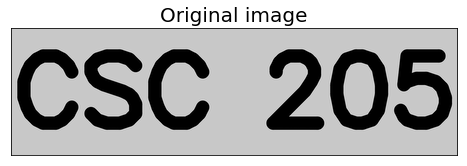

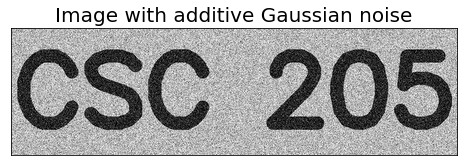

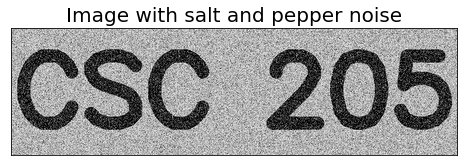

In [8]:
img_gray = np.ones((400, 1400), dtype=np.uint8) * 200
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img_gray, "CSC 205", (10, 300), font, 10, 0, 40, cv2.LINE_AA)
imshow(img_gray, "Original image")

noise_g = np.round(100.0 * np.random.normal(size=(400, 1400)))
img_noise_g = np.clip(img_gray + noise_g, 0, 255)
imshow(img_noise_g, "Image with additive Gaussian noise")

noise_sp = np.round(np.random.normal(size=(400, 1400)) * 0.5) * 1000000
img_noise_sp = np.clip(img_gray + noise_sp, 0, 255)
imshow(img_noise_sp, "Image with salt and pepper noise")


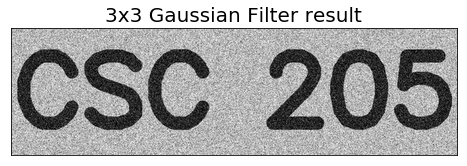

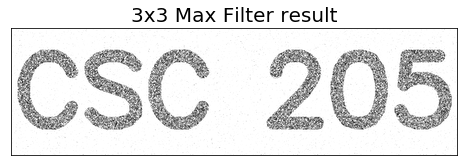

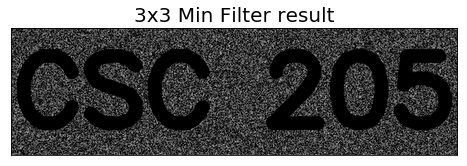

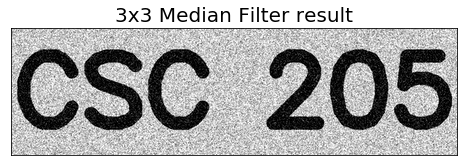

In [9]:
# Noise removal for Gaussian noise
K = 3
img_noise = img_noise_g.astype(np.uint8)
img_g = cv2.GaussianBlur(img_noise, (K,K), 0)
imshow(img_g, "{0}x{0} Gaussian Filter result".format(K))

img_max = cv2.dilate(img_noise, np.ones((K,K)), iterations=1)
imshow(img_max, "{0}x{0} Max Filter result".format(K))

img_min = cv2.erode(img_noise, np.ones((K,K)), iterations=1)
imshow(img_min, "{0}x{0} Min Filter result".format(K))

img_med = cv2.medianBlur(img_noise, K)
imshow(img_med, "{0}x{0} Median Filter result".format(K))


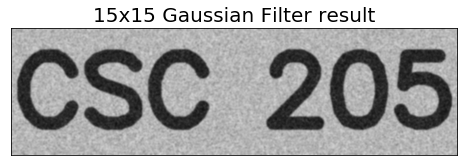

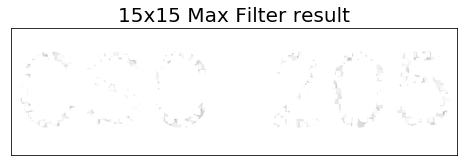

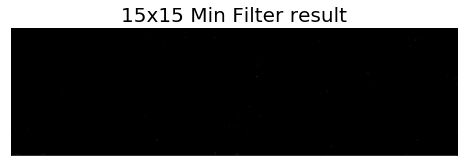

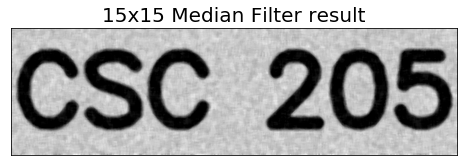

In [10]:
K = 15
img_noise = img_noise_g.astype(np.uint8)
img_g = cv2.GaussianBlur(img_noise, (K,K), 0)
imshow(img_g, "{0}x{0} Gaussian Filter result".format(K))

img_max = cv2.dilate(img_noise, np.ones((K,K)), iterations=1)
imshow(img_max, "{0}x{0} Max Filter result".format(K))

img_min = cv2.erode(img_noise, np.ones((K,K)), iterations=1)
imshow(img_min, "{0}x{0} Min Filter result".format(K))

img_med = cv2.medianBlur(img_noise, K)
imshow(img_med, "{0}x{0} Median Filter result".format(K))

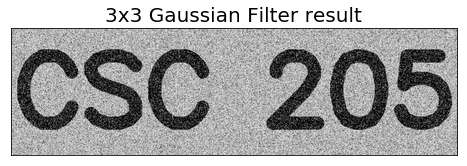

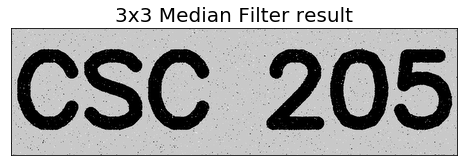

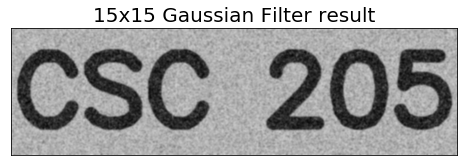

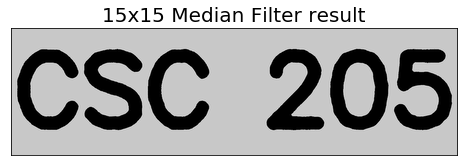

In [11]:
# Noise removal for salt and pepper noise
K = 3
img_noise = img_noise_sp.astype(np.uint8)
img_g = cv2.GaussianBlur(img_noise, (K,K), 0)
imshow(img_g, "{0}x{0} Gaussian Filter result".format(K))

img_med = cv2.medianBlur(img_noise, K)
imshow(img_med, "{0}x{0} Median Filter result".format(K))

K = 15
img_noise = img_noise_sp.astype(np.uint8)
img_g = cv2.GaussianBlur(img_noise, (K,K), 0)
imshow(img_g, "{0}x{0} Gaussian Filter result".format(K))

img_med = cv2.medianBlur(img_noise, K)
imshow(img_med, "{0}x{0} Median Filter result".format(K))


# Morphological filtering example

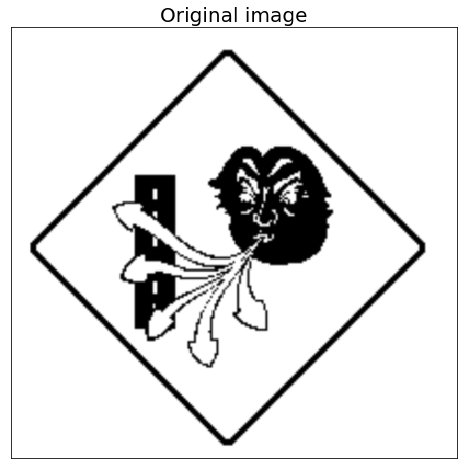

In [12]:
# Load image (note that we are not loading binary, but emulating how it works)
img_gray = 255 - cv2.imread("../images/sign.png", 0)
# Image dislpay for binary image
def imshow(img, title=""):
    plt.figure(figsize=(8, 8))
    plt.imshow(255 - img, cmap="gray", vmin = 0, vmax = 255)
    _ = plt.yticks([])
    _ = plt.xticks([])
    plt.title(title, fontsize=20)
# Show image
imshow(img_gray, "Original image")

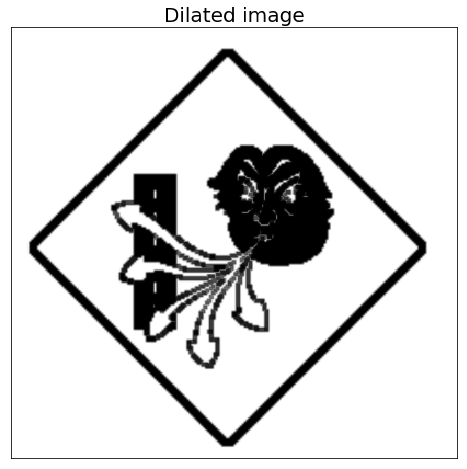

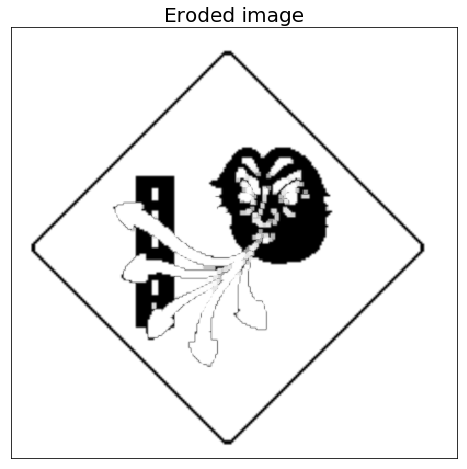

In [13]:
# Erode, Dilate example
imshow(cv2.dilate(img_gray, np.ones((3,3))), "Dilated image")
imshow(cv2.erode(img_gray, np.ones((3,3))), "Eroded image")

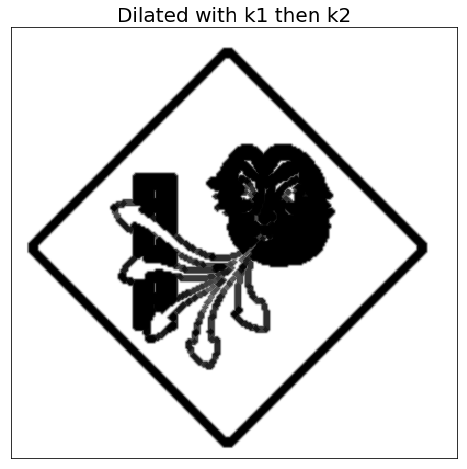

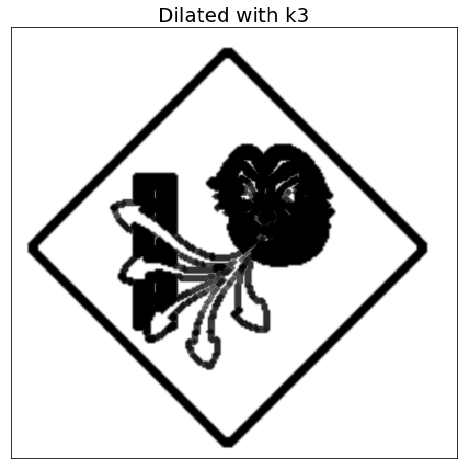

In [14]:
# Showing associative nature of dilation
k1 = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
], dtype=np.uint8)
k2 = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
], dtype=np.uint8)
k3 = cv2.dilate(k1, k2)
imshow(cv2.dilate(cv2.dilate(img_gray, k1), k2), "Dilated with k1 then k2")
imshow(cv2.dilate(img_gray, k3), "Dilated with k3")

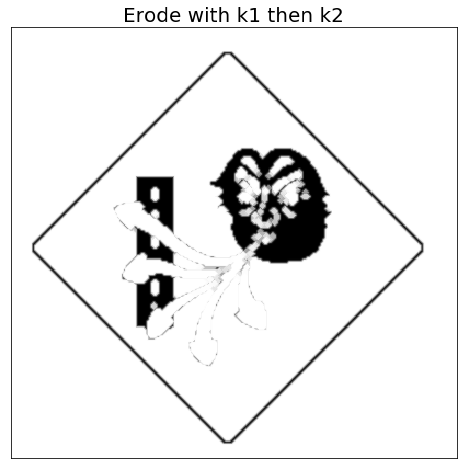

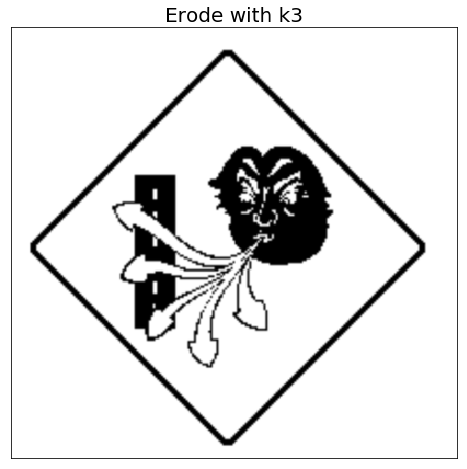

In [15]:
# Showing non-associative nature of erosion
k1 = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
], dtype=np.uint8)
k2 = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
], dtype=np.uint8)
k3 = cv2.erode(k1, k2)
imshow(cv2.erode(cv2.erode(img_gray, k1), k2), "Erode with k1 then k2")
imshow(cv2.erode(img_gray, k3), "Erode with k3")

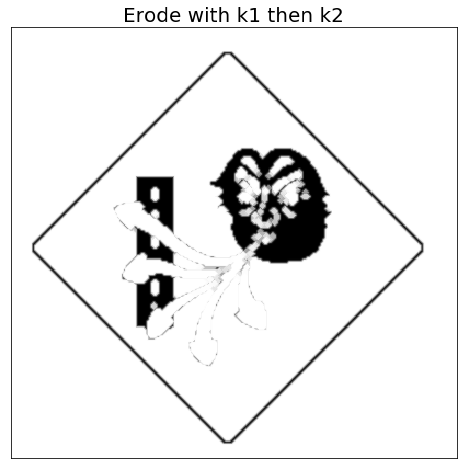

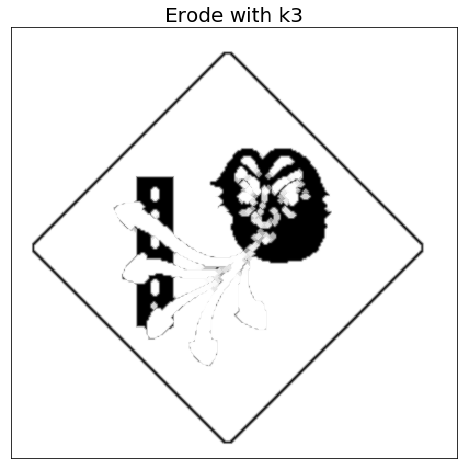

In [16]:
# Merging two erosion
k1 = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
], dtype=np.uint8)
k2 = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
], dtype=np.uint8)
k3 = cv2.dilate(k1, k2)
imshow(cv2.erode(cv2.erode(img_gray, k1), k2), "Erode with k1 then k2")
imshow(cv2.erode(img_gray, k3), "Erode with k3")